In [1]:
from skimage import io, measure, color, morphology

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import numpy as np

In [12]:
import os

In [24]:
opened = morphology.opening(img, morphology.disk(2))

In [31]:
io.imsave('/tmp/test.png', opened)

In [5]:
import glob

In [6]:
files = glob.glob('mask/*.png')

In [15]:
for file in files:
    img = io.imread(file)
    opnd = morphology.opening(img, morphology.disk(2))
    out = np.concatenate((img, opnd), axis=1)
    io.imsave('generated/'+os.path.basename(file), out)

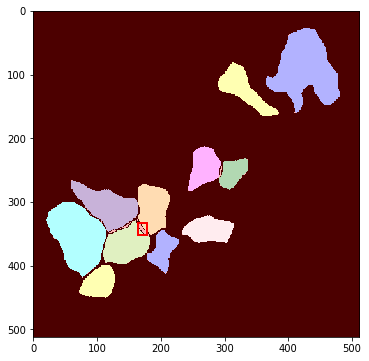

In [28]:
image_label_overlay = color.label2rgb(label, image=img)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in measure.regionprops(label):
    if region.area <= 1000:
        # draw rectang5e around segmented coins/
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
